# Tools

In [11]:
import os 
from dotenv import load_dotenv
load_dotenv()

import google.generativeai as genai
from langchain_google_genai import GoogleGenerativeAI

gemini_api_key = os.getenv("GEMINI_API_KEY")
genai.configure(api_key = gemini_api_key)

In [12]:
llm = GoogleGenerativeAI(model = "gemini-1.5-flash",temperature=0.7)

In [14]:
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration


hf_model = "Salesforce/blip-image-captioning-large"
device = 'cuda' if torch.cuda.is_available() else 'cpu'

processor = BlipProcessor.from_pretrained(hf_model)
model = BlipForConditionalGeneration.from_pretrained(hf_model).to(device)

model.safetensors:  67%|######6   | 1.26G/1.88G [00:00<?, ?B/s]

d:\Users\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Parthiban\.cache\huggingface\hub\models--Salesforce--blip-image-captioning-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


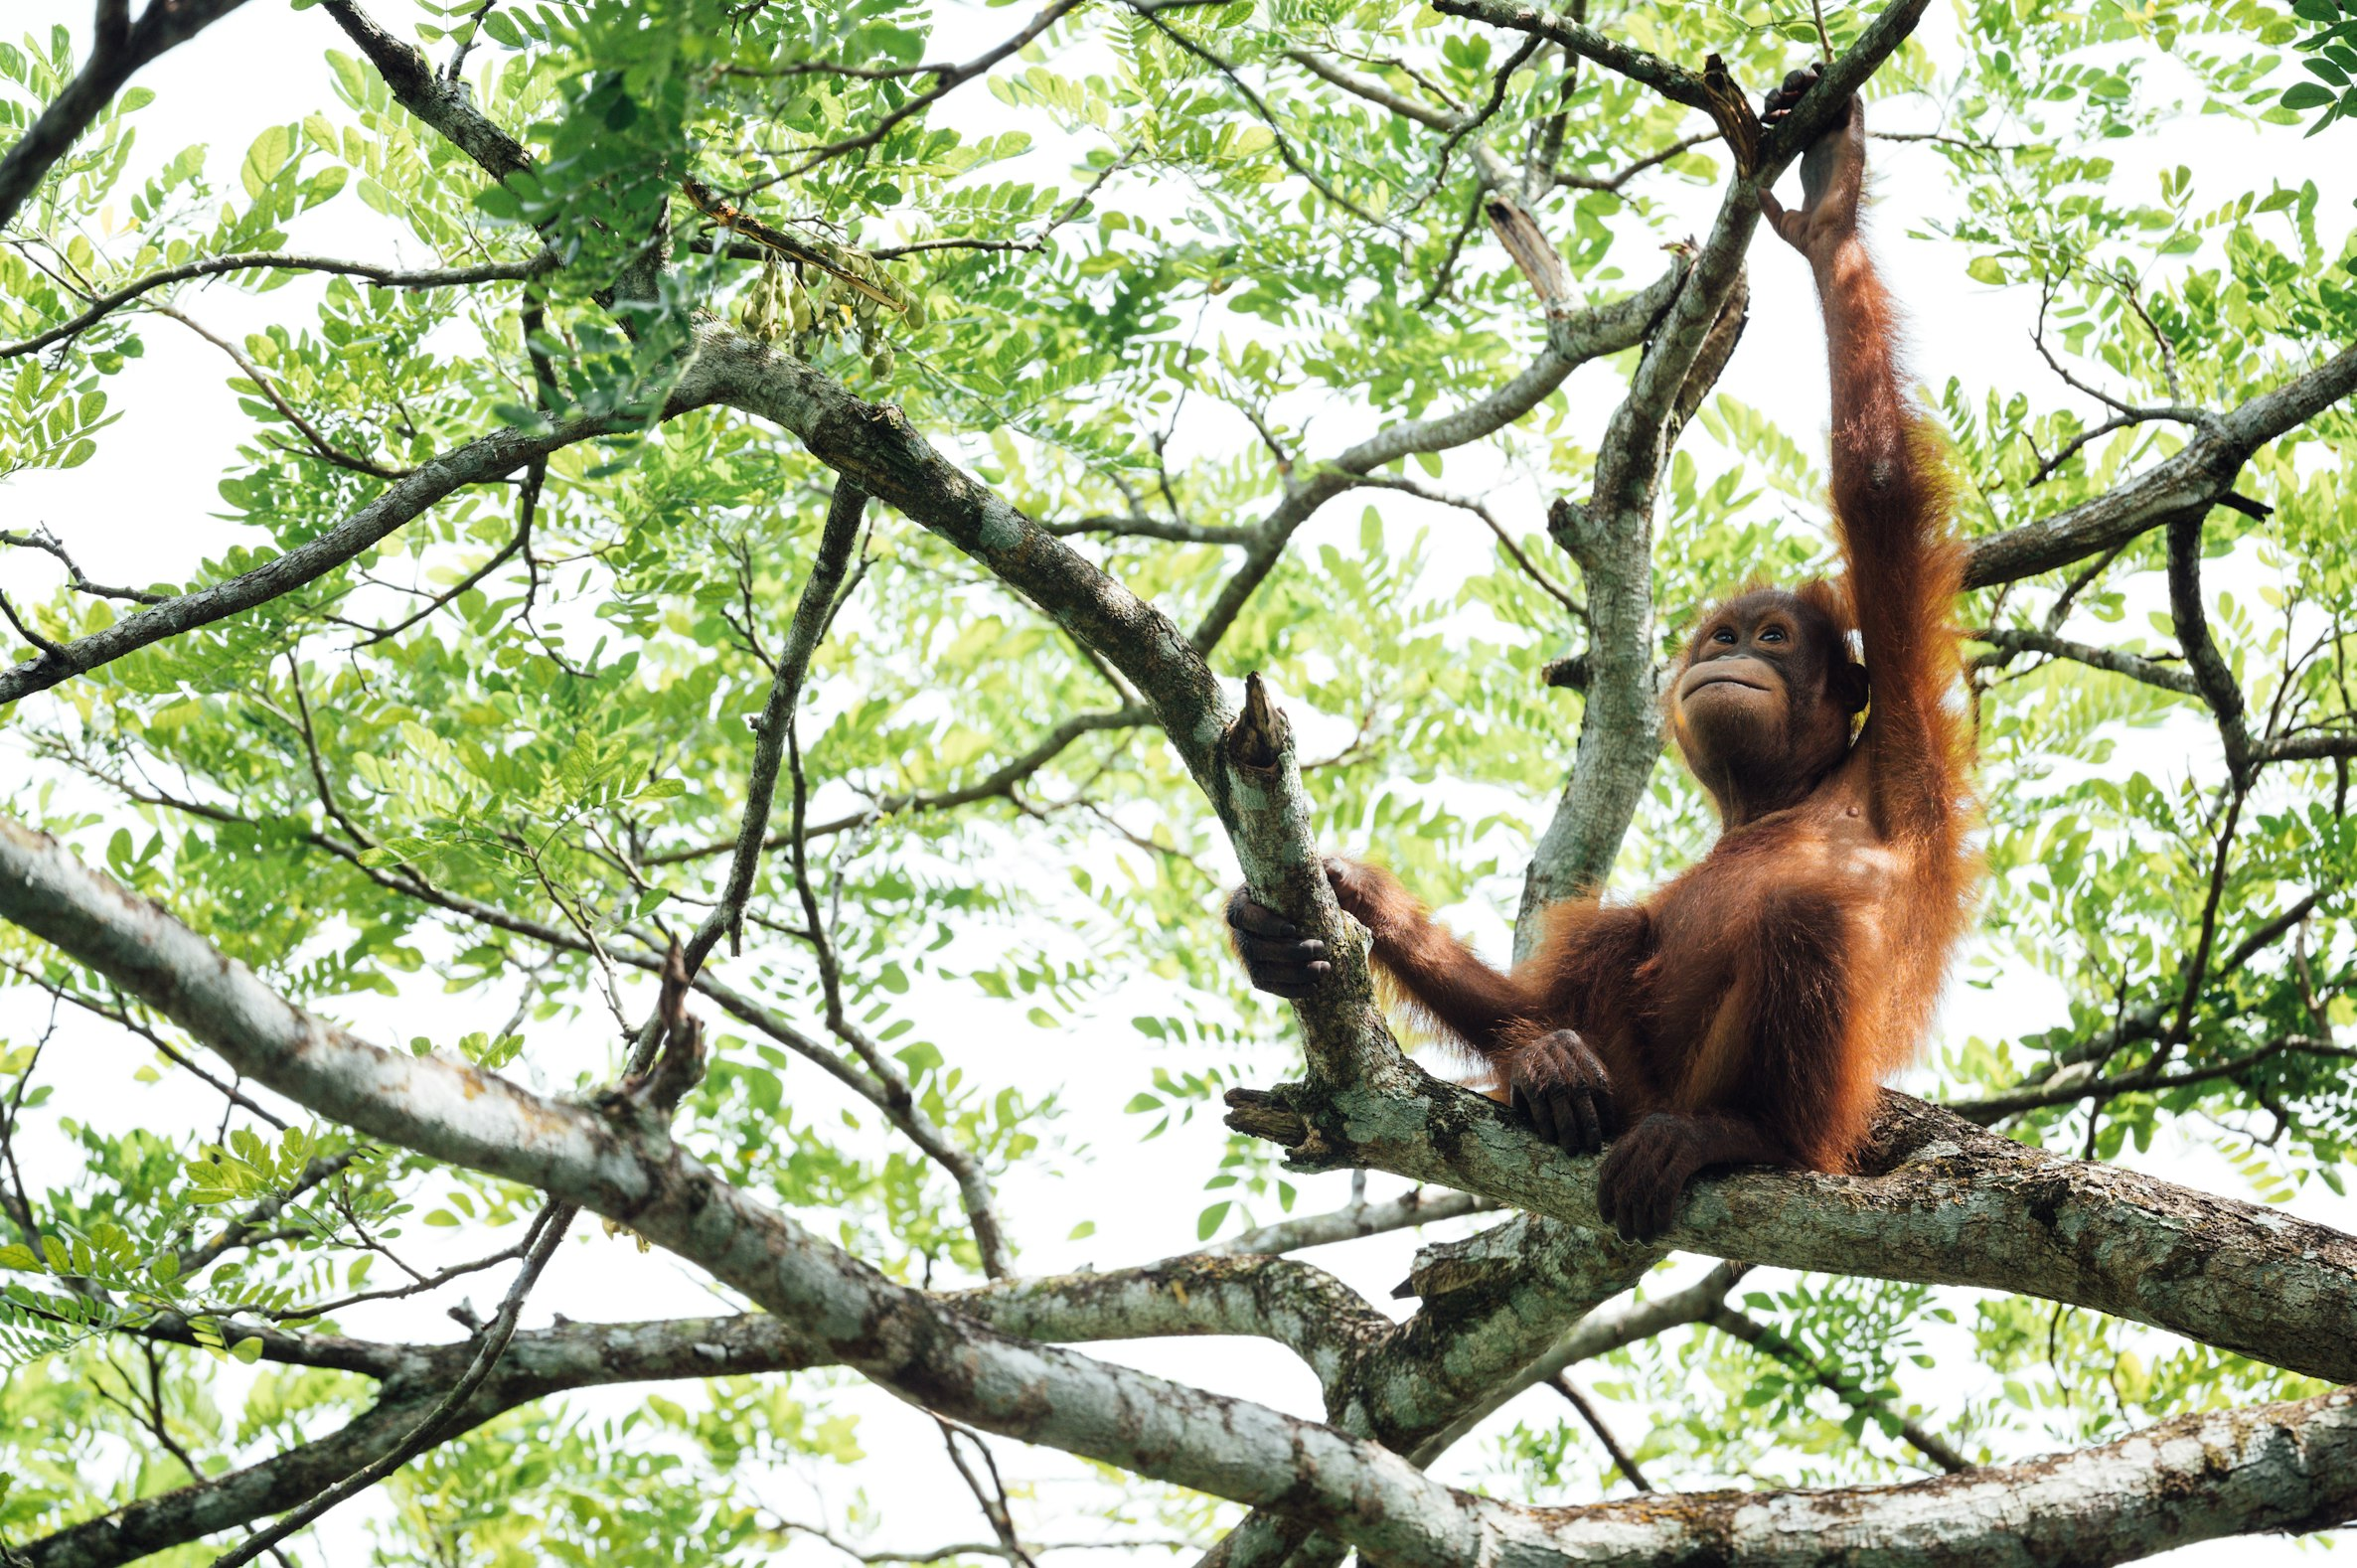

In [15]:
import requests
from PIL import Image

img_url = 'https://images.unsplash.com/photo-1616128417859-3a984dd35f02?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=2372&q=80' 
image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
image

In [17]:
inputs = processor(image, return_tensors="pt").to(device)

out = model.generate(**inputs, max_new_tokens=20)
print(processor.decode(out[0], skip_special_tokens=True))

there is a monkey that is sitting in a tree
